<a href="https://colab.research.google.com/github/prad69/MLAssignments/blob/main/Unsupervised_Machine_Learning_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')
X = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/IK_UNSUP_DATA.csv")

Mounted at /content/drive


In [3]:
X.head()


,Age,Annual Income,Spending Score
0,54,60,28
1,36,4,26
2,35,15,72
3,41,70,77
4,60,27,43


You are given a dataset containing information about customers in a mall, including their age, annual income, and spending score. The mall wants to identify different customer segments while maintaining the topological structure of the given data. Write a Python function that takes the dataset as input and performs the suitable clustering on it.



Also, visualize the data and clusters for comprehensibility. Your function should return the cluster labels assigned to each customer. You may apply both BIRCH and SOM

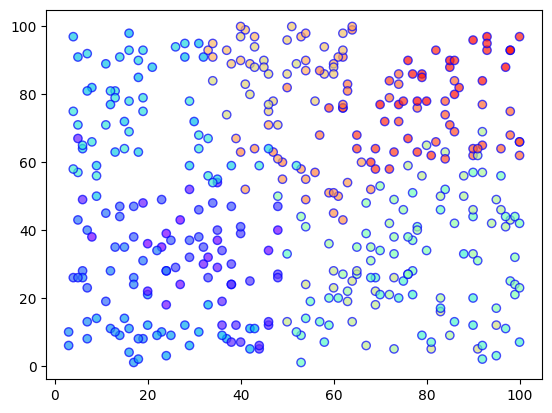

In [4]:
from sklearn.cluster import Birch
brc = Birch(branching_factor=6, n_clusters=None, threshold=1.5)
brc.fit(X)
labels = brc.predict(X)
plt.scatter(X['Annual Income'], X['Spending Score'], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

In [5]:
!pip install sklearn-som
from sklearn_som.som import SOM

In [6]:
clusters = 5
som = SOM(m=clusters, n=1, dim=2)
som.fit(X)
predictions = som.predict(X)
plt.scatter(X['Annual Income'], X['Spending Score'], c=predictions, cmap='rainbow', alpha=0.7, edgecolors='b')

KeyError: ignored

Given the following data, apply LDA on the data to retrieve the topics of the data sentences.

data =

["I want to watch a movie this weekend.", "I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.", "I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.", "Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!", "This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains."]

In [ ]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
data =["I want to watch a movie this weekend.", "I went shopping yesterday. New Zealand won the World Test Championship by beating India by eight wickets at Southampton.", "I don’t watch cricket. Netflix and Amazon Prime have very good movies to watch.", "Movies are a nice way to chill however, this time I would like to paint and read some good books. It’s been so long!", "This blueberry milkshake is so good! Try reading Dr. Joe Dispenza’s books. His work is such a game-changer! His books helped to learn so much about how our thoughts impact our biology and how we can all rewire our brains."]

tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

train_data = tfidf.fit_transform(data)


In [ ]:
model=LatentDirichletAllocation(n_components=5)
lda_matrix = model.fit_transform(train_data)
lda_components=model.components_

# Print the topics with their terms
terms = tfidf.get_feature_names_out()

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

In [ ]:
lda_components


